In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn
from sklearn.model_selection import train_test_split

In [197]:
data = pd.read_excel (r'./utilities/data/Concrete_Data.xls')
print (data.shape)

(1030, 9)


In [198]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [199]:
x = data.iloc[0:1030, :-1]
y = data.iloc[:,-1]

In [200]:
print('x shape: ' , x.shape)
print('y shape: ' , y.shape)

x shape:  (1030, 8)
y shape:  (1030,)


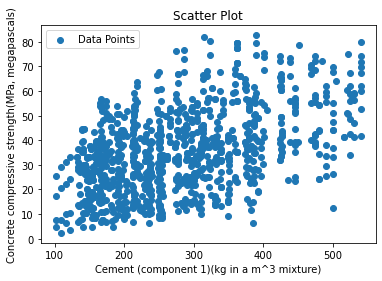

In [201]:
plt.scatter(x.iloc[:,0],y)
plt.title('Scatter Plot')
plt.xlabel("Cement (component 1)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength(MPa, megapascals)")
plt.legend(['Data Points', 'Model'])
plt.show()

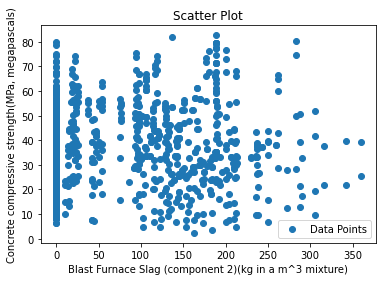

In [202]:
plt.scatter(x.iloc[:,1],y)
plt.title('Scatter Plot')
plt.xlabel("Blast Furnace Slag (component 2)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength(MPa, megapascals)")
plt.legend(['Data Points', 'Model'])
plt.show()

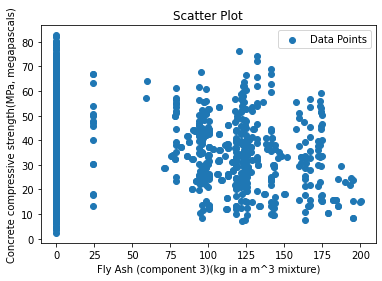

In [203]:
plt.scatter(x.iloc[:,2],y)
plt.title('Scatter Plot')
plt.xlabel("Fly Ash (component 3)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength(MPa, megapascals)")
plt.legend(['Data Points', 'Model'])
plt.show()

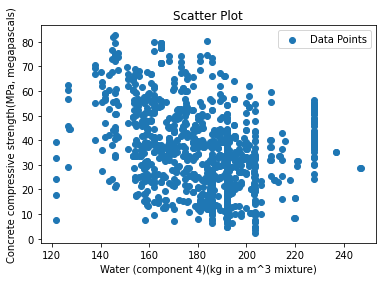

In [204]:
plt.scatter(x.iloc[:,3],y)
plt.title('Scatter Plot')
plt.xlabel("Water (component 4)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength(MPa, megapascals)")
plt.legend(['Data Points', 'Model'])
plt.show()

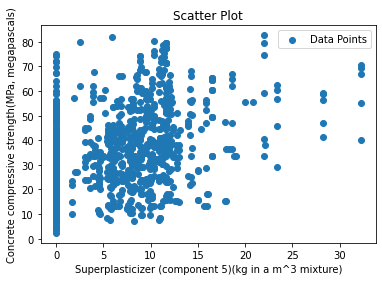

In [205]:
plt.scatter(x.iloc[:,4],y)
plt.title('Scatter Plot')
plt.xlabel("Superplasticizer (component 5)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength(MPa, megapascals)")
plt.legend(['Data Points', 'Model'])
plt.show()

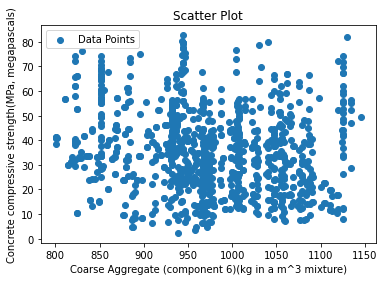

In [206]:
plt.scatter(x.iloc[:,5],y)
plt.title('Scatter Plot')
plt.xlabel("Coarse Aggregate (component 6)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength(MPa, megapascals)")
plt.legend(['Data Points', 'Model'])
plt.show()

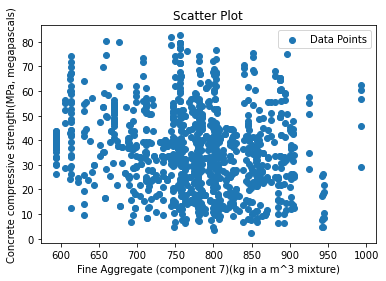

In [207]:
plt.scatter(x.iloc[:,6],y)
plt.title('Scatter Plot')
plt.xlabel("Fine Aggregate (component 7)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength(MPa, megapascals)")
plt.legend(['Data Points', 'Model'])
plt.show()

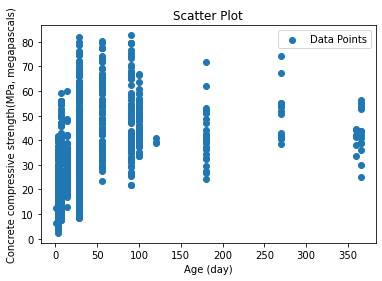

In [208]:
plt.scatter(x.iloc[:,7],y)
plt.title('Scatter Plot')
plt.xlabel("Age (day)")
plt.ylabel("Concrete compressive strength(MPa, megapascals)")
plt.legend(['Data Points', 'Model'])
plt.show()

In [209]:
# Split the data into two parts 
x_train = x.iloc[0:900, :]
x_test = x.iloc[900:, :]
y_train = y.iloc[0:900]
y_test = y.iloc[900:]

print("Size of the training set: " + str(x_train.shape[0]))
print("Size of the test/evaluation set: " + str(x_test.shape[0]))

Size of the training set: 900
Size of the test/evaluation set: 130


In [210]:
def derivate_M(x, y, m, b):
    n = len(x)
    y_pred = m * x + b
    d_m = (-2/n) * sum(x * (y - y_pred)) #derivative w.r.t m
    return d_m

In [211]:
def derivate_B(x, y, m, b):
    n = len(x)
    y_pred = m * x + b
    d_b = (-2/n) * sum(y - y_pred) #derivative w.r.t b
    return d_b

In [212]:
def meanSquareError(x, y, m, b):
    n = len(x)
    y_predict = m * x + b
    mse = (1/n) * np.sum(np.square(y - y_predict))
    return mse

In [226]:
def regression(x,y, max_iter, alpha=1e-02, stop_cond = 1e-01):
    n = len(x)
    num_iter = 0

    m = np.random.uniform(0,1)
    b = np.random.uniform(0,1)
    stoploss = 300
    
    loss = meanSquareError(x, y, m, b)
    
    while (num_iter < max_iter):
        m_new = m - alpha * derivate_M(x,y,m,b)
        b_new = b - alpha * derivate_B(x,y,m,b)
        updated_MSE = meanSquareError(x,y,m_new,b_new)
        
        if updated_MSE > loss:
            alpha = alpha * 0.85
        elif updated_MSE <= loss:
            alpha = alpha * 1.10
        
        loss = updated_MSE
        m = m_new
        b = b_new
        num_iter+=1
        
    print("Number of Iteration: ", num_iter)
    
    m_updated = m
    b_updated = b
    loss_updated = loss
    y_predict = m * x + b
    
    variance_computed = (np.max(Y) - np.min(Y))
    required_var = 1 - (loss_updated/variance_computed)
    
    return m_updated, b_updated, loss_updated, y_predict, required_var
    

In [227]:
### Train univariate model 

In [235]:
def train(x_train, y_train):
    max_iter = 10000
    alpha = 1e-07
    stop_condition = 1e-02
    univariate_dic = {}
    for i in range(0, 7):
        current_x_train = x_train.iloc[:,i]
        
        final_m, final_b, final_loss, final_pred, var_req = regression(current_x_train, y_train, max_iter, alpha, stop_condition)
        
        feature_type = str(i)
        current_x_test = x_test.iloc[:,i]
        univariate_dic[feature_type] = [final_m, final_b, final_loss, current_x_test, final_pred, var_req]
    return univariate_dic

In [236]:
dict_1 = train(x_train,y_train)

Number of Iteration:  10000
Number of Iteration:  10000
Number of Iteration:  10000
Number of Iteration:  10000
Number of Iteration:  10000
Number of Iteration:  10000
Number of Iteration:  10000


In [244]:
for key in dict_1.keys():
    loss_train = dict_1[key][1]
#     loss_test = loss_function(dict_1[key][2], Y_test, dict_1[key][0])
    print("Feature is ", key)
#     print('Training Loss is ', loss_train)
#     print('Testing Loss is ', loss_test)
    print('Final M Value is ', dict_1[key][0])
    print('Final B Value is ', dict_1[key][1])
#     print('Required Variance ', dict_1[key][4])
#     print('Explained Variance for testing set: ', 1-(loss_test/(np.max(Y_test)-np.min(Y_test))))
    print('')

Feature is  0
Final M Value is  0.11630005601326594
Final B Value is  1.195528633633612

Feature is  1
Final M Value is  0.0935681138519697
Final B Value is  22.16180101325695

Feature is  2
Final M Value is  0.030039742342876423
Final B Value is  31.955181950331124

Feature is  3
Final M Value is  0.1902216510625626
Final B Value is  0.8495242775264634

Feature is  4
Final M Value is  1.1638941269161522
Final B Value is  29.61350128174177

Feature is  5
Final M Value is  0.036269562157244535
Final B Value is  0.3245953946470525

Feature is  6
Final M Value is  0.04482557229191928
Final B Value is  0.8666107742320068



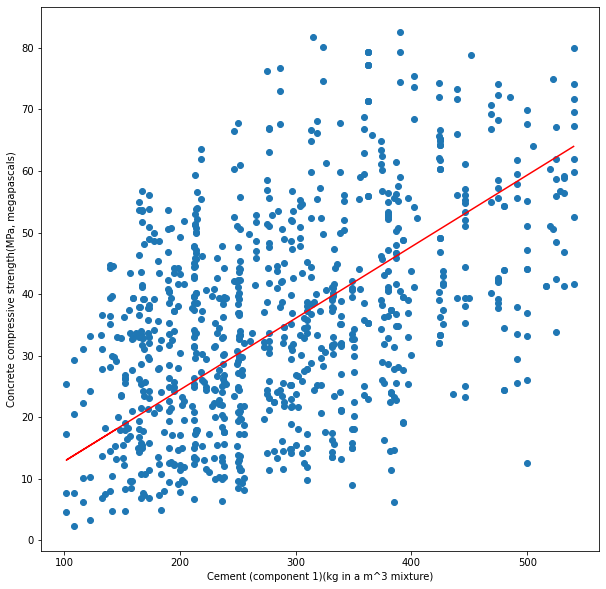

In [249]:
plt.figure(figsize=(10,10))
x = x_train.iloc[:,0]
y = 1.195528633633612 + x*0.11630005601326594
plt.scatter(x, y_train)
plt.xlabel("Cement (component 1)(kg in a m^3 mixture)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(x,y, color='red')
plt.show()

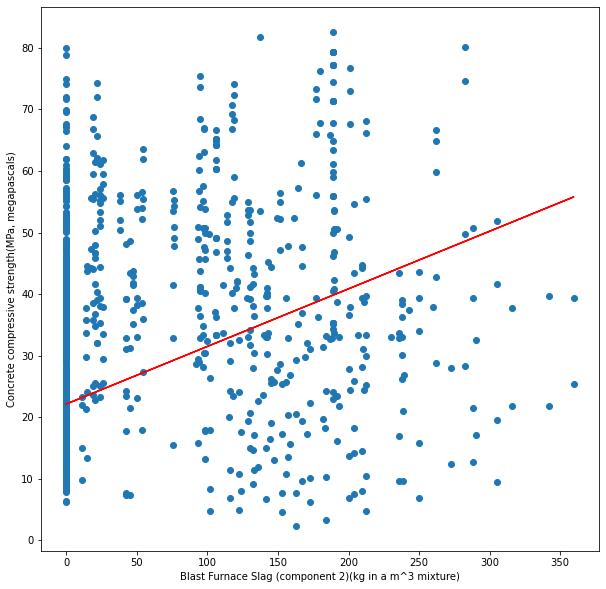

In [250]:
plt.figure(figsize=(10,10))
x = x_train.iloc[:,1]
y = 22.16180101325695 + x*0.0935681138519697
plt.scatter(x, y_train)
plt.xlabel("Blast Furnace Slag (component 2)(kg in a m^3 mixture)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(x,y, color='red')
plt.show()

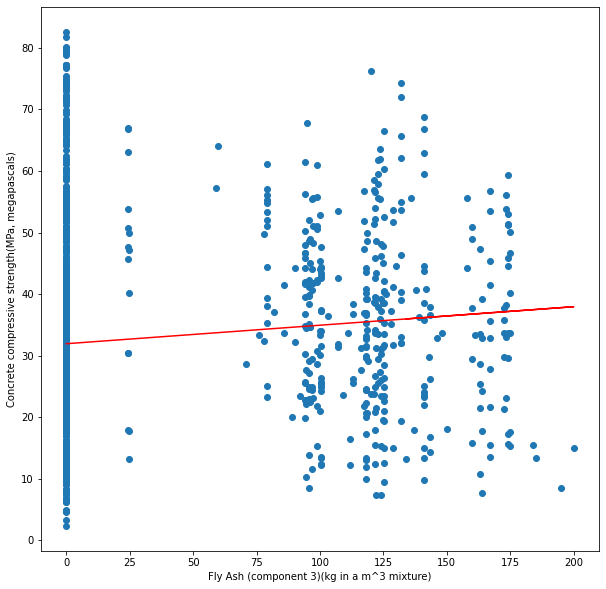

In [251]:
plt.figure(figsize=(10,10))
x = x_train.iloc[:,2]
y = 31.955181950331124 + x*0.030039742342876423
plt.scatter(x, y_train)
plt.xlabel("Fly Ash (component 3)(kg in a m^3 mixture)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(x,y, color='red')
plt.show()

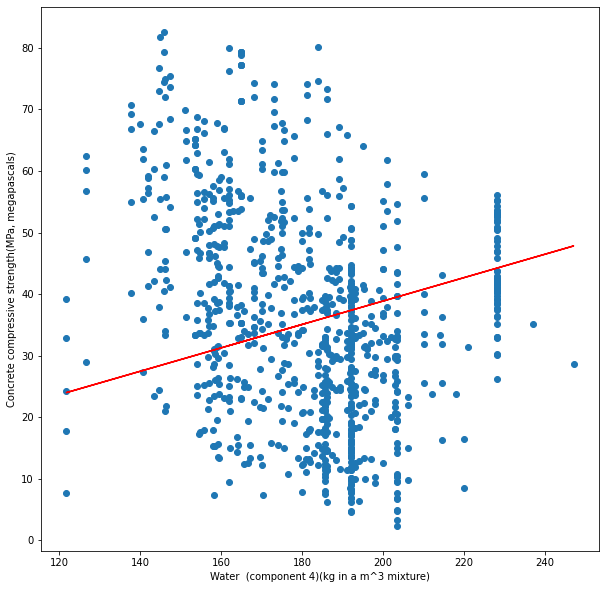

In [253]:
plt.figure(figsize=(10,10))
x = x_train.iloc[:,3]
y = 0.8495242775264634 + x*0.1902216510625626
plt.scatter(x, y_train)
plt.xlabel("Water  (component 4)(kg in a m^3 mixture)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(x,y, color='red')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
X = x_train.iloc[:,4]
Y = 29.61350127 + X*1.16389401
plt.scatter(X, y_train)
plt.xlabel("Superplasticizer (component 5)(kg in a m^3 mixture)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(X,Y, color='red')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
X = x_train.iloc[:,5]
Y = 0.4437451  + X*0.03614992
plt.scatter(X, y_train)
plt.xlabel("Coarse Aggregate  (component 6)(kg in a m^3 mixture)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(X,Y, color='red')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
X = x_train.iloc[:,6]
Y = 0.41485268 + X*0.04541628
plt.scatter(X, y_train)
plt.xlabel('Fine Aggregate (component 7)(kg in a m^3 mixture)')
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(X,Y, color='red')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
X = x_train.iloc[:,7]
Y = 27.80325371 + X*0.11947564
plt.scatter(X, y_train)
plt.xlabel("Age (day)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(X,Y, color='red')
plt.show()